In [82]:
import numpy as np
import seaborn as sns

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [83]:
x = torch.linspace(-4, 4, 21, requires_grad = True)
Y = 5.0*x ** 2.0
# y = torch.sum(Y)
print(Y.shape)


torch.Size([21])


In [84]:
class LinearRegressor_1D(nn.Module):
    def __init__(self):
        super(LinearRegressor_1D, self).__init__()
        self.w = torch.nn.Parameter( torch.randn(2) )
        # self.b = torch.nn.Parameter( torch.randn(1) )
        self.double()

    def forward(self, x):
        return (self.w[0]*x + self.w[1]).double()

    pass

In [85]:
size = 100
x = torch.linspace(-10, 10, size)
y_data = x*0.7 + np.random.normal(size=size) + 7.0        # RANDOM data points with noise

f = LinearRegressor_1D()
y = f.forward(x)

tensor(112.6014, dtype=torch.float64, grad_fn=<MseLossBackward0>)


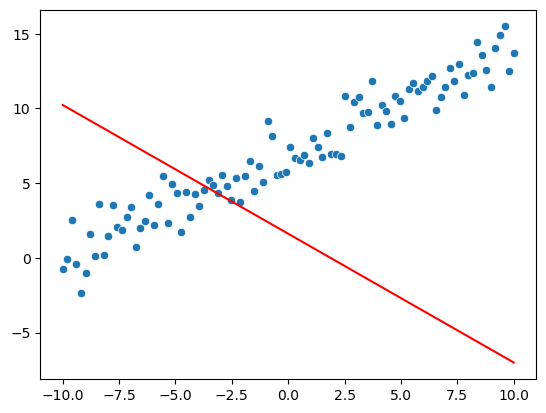

In [86]:
sns.scatterplot(x=x,y=y_data)
sns.lineplot(x=x, y=y.detach().numpy(), color='red')

loss = torch.nn.functional.mse_loss(y, y_data)
print(loss)

In [87]:
learn_rate = 0.01
optimizer = torch.optim.SGD(f.parameters(), lr=learn_rate)

epochs = 110
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()  # reiniciar los gradientes (poner en cero)

    y_fwd = f.forward(x)
    loss_value = torch.nn.functional.mse_loss(y_fwd, y_data)

    loss_value.backward()  # compute gradient
    optimizer.step()    # Iterate Algorithm

    losses.append(loss_value.item())

    pass

<AxesSubplot:>

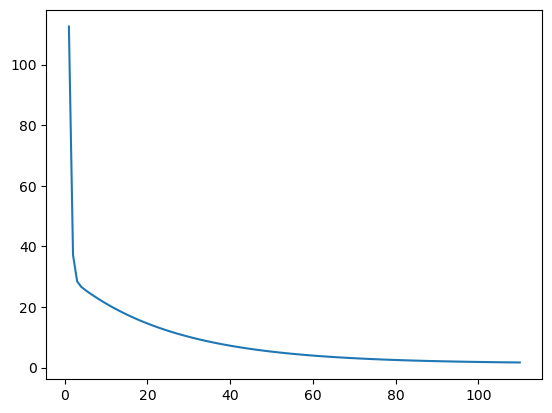

In [88]:
x_ep = np.linspace(1, epochs, epochs)

sns.lineplot(x=x_ep, y=losses)

tensor(1.6556, dtype=torch.float64, grad_fn=<MseLossBackward0>)


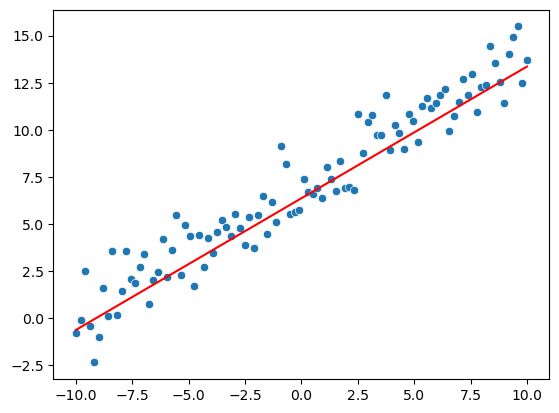

In [89]:
y = f.forward(x)
sns.scatterplot(x=x,y=y_data)
sns.lineplot(x=x, y=y.detach().numpy(), color='red')

loss = torch.nn.functional.mse_loss(y, y_data)
print(loss)

In [90]:
y_fwd = f.forward(x)
loss_value = torch.nn.functional.mse_loss(y_fwd, y_data)

print("loss:", loss_value)

loss: tensor(1.6556, dtype=torch.float64, grad_fn=<MseLossBackward0>)
